In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
from bs4 import BeautifulSoup as bs
import requests

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing

In [2]:
link = 'https://www1.ncdc.noaa.gov/pub/data/swdi/stormevents/csvfiles/'
response = requests.get(link)
html = response.text

In [3]:
soup = bs(html)

In [4]:
names = soup.find_all('a',{"class":""})
stormevent_details_all = []

# For loop to get all the names
# Reference code from https://medium.com/@yves.jacquot/predicting-tornado-magnitude-with-machine-learning-c76df84d7872
for name in names[7:-2]:
        #print(name)
    #getting only the files with storm events
    if name.attrs['href'].startswith('StormEvents_details'):
        filename = name.attrs['href']
        storm_url = link+filename
        #print(storm_url)
        
        iter_csv = pd.read_csv(storm_url, compression='gzip', iterator=True, chunksize=1000)
        stormevent_details_all.append(pd.concat([chunk[chunk['EVENT_TYPE'].map(lambda x: x.lower())
                                                        == 'tornado'] for chunk in iter_csv], ignore_index=True))
        
combined_tornado_df = pd.concat(stormevent_details_all)


In [5]:
combined_tornado_df.head()


,BEGIN_YEARMONTH,BEGIN_DAY,BEGIN_TIME,END_YEARMONTH,END_DAY,END_TIME,EPISODE_ID,EVENT_ID,STATE,STATE_FIPS,...,END_RANGE,END_AZIMUTH,END_LOCATION,BEGIN_LAT,BEGIN_LON,END_LAT,END_LON,EPISODE_NARRATIVE,EVENT_NARRATIVE,DATA_SOURCE
0,195004,28,1445,195004,28,1445,NaN,10096222,OKLAHOMA,40.0,...,0.0,NaN,NaN,35.12,-99.20,35.17,-99.20,NaN,NaN,PUB
1,195004,29,1530,195004,29,1530,NaN,10120412,TEXAS,48.0,...,0.0,NaN,NaN,31.90,-98.60,31.73,-98.60,NaN,NaN,PUB
2,195007,5,1800,195007,5,1800,NaN,10104927,PENNSYLVANIA,42.0,...,0.0,NaN,NaN,40.58,-75.70,40.65,-75.47,NaN,NaN,PUB
3,195007,5,1830,195007,5,1830,NaN,10104928,PENNSYLVANIA,42.0,...,0.0,NaN,NaN,40.60,-76.75,NaN,NaN,NaN,NaN,PUB
4,195007,24,1440,195007,24,1440,NaN,10104929,PENNSYLVANIA,42.0,...,0.0,NaN,NaN,41.63,-79.68,NaN,NaN,NaN,NaN,PUB


In [2]:
combined_tornado_df = pd.read_csv('data_sets/tornado_data_1950to2020.csv', low_memory=False)

In [3]:
combined_tornado_df.fillna(0,inplace=True)
combined_tornado_df=combined_tornado_df.drop(columns=['Unnamed: 0'], axis=1)
combined_tornado_df.head()


,BEGIN_YEARMONTH,BEGIN_DAY,BEGIN_TIME,END_YEARMONTH,END_DAY,END_TIME,EPISODE_ID,EVENT_ID,STATE,STATE_FIPS,...,END_RANGE,END_AZIMUTH,END_LOCATION,BEGIN_LAT,BEGIN_LON,END_LAT,END_LON,EPISODE_NARRATIVE,EVENT_NARRATIVE,DATA_SOURCE
0,195004,28,1445,195004,28,1445,0.0,10096222,OKLAHOMA,40.0,...,0.0,0,0,35.12,-99.20,35.17,-99.20,0,0,PUB
1,195004,29,1530,195004,29,1530,0.0,10120412,TEXAS,48.0,...,0.0,0,0,31.90,-98.60,31.73,-98.60,0,0,PUB
2,195007,5,1800,195007,5,1800,0.0,10104927,PENNSYLVANIA,42.0,...,0.0,0,0,40.58,-75.70,40.65,-75.47,0,0,PUB
3,195007,5,1830,195007,5,1830,0.0,10104928,PENNSYLVANIA,42.0,...,0.0,0,0,40.60,-76.75,0.00,0.00,0,0,PUB
4,195007,24,1440,195007,24,1440,0.0,10104929,PENNSYLVANIA,42.0,...,0.0,0,0,41.63,-79.68,0.00,0.00,0,0,PUB


In [189]:
state_fips_df = combined_tornado_df[['STATE','STATE_FIPS']].copy()
state_fips_df.sort_values(by=['STATE_FIPS'], inplace=True)
state_fips_df.drop_duplicates(inplace=True)
state_fips_df.head()

,STATE,STATE_FIPS
50689,ALABAMA,1.0
50418,ALASKA,2.0
36303,ARIZONA,4.0
5461,ARKANSAS,5.0
69433,CALIFORNIA,6.0


In [190]:
state_fips_df.to_csv('data_sets/state_fips.csv', index=False)

In [170]:
combined_tornado_df.shape

(72693, 51)

In [5]:
tornado_ef = combined_tornado_df[['BEGIN_YEARMONTH','STATE_FIPS','BEGIN_TIME','TOR_F_SCALE','STATE','CZ_NAME','TOR_LENGTH','TOR_WIDTH']].copy()
tornado_ef

,BEGIN_YEARMONTH,STATE_FIPS,BEGIN_TIME,TOR_F_SCALE,STATE,CZ_NAME,TOR_LENGTH,TOR_WIDTH
0,195004,40.0,1445,F3,OKLAHOMA,WASHITA,3.40,400.0
1,195004,48.0,1530,F1,TEXAS,COMANCHE,11.50,200.0
2,195007,42.0,1800,F2,PENNSYLVANIA,LEHIGH,12.90,33.0
3,195007,42.0,1830,F2,PENNSYLVANIA,DAUPHIN,0.00,13.0
4,195007,42.0,1440,F0,PENNSYLVANIA,CRAWFORD,0.00,33.0
...,...,...,...,...,...,...,...,...
72688,202103,48.0,1548,EF1,TEXAS,RANDALL,6.61,800.0
72689,202103,48.0,1832,EFU,TEXAS,BOSQUE,0.53,50.0
72690,202103,22.0,1908,EF1,LOUISIANA,DE SOTO,2.16,400.0
72691,202103,48.0,1604,EF1,TEXAS,ARMSTRONG,1.55,800.0


In [239]:
tornado_ef.to_csv('data_sets/tornado_ef.csv', index=False)

In [6]:
tornado_ef.head()

,BEGIN_YEARMONTH,STATE_FIPS,BEGIN_TIME,TOR_F_SCALE,STATE,CZ_NAME,TOR_LENGTH,TOR_WIDTH
0,195004,40.0,1445,F3,OKLAHOMA,WASHITA,3.4,400.0
1,195004,48.0,1530,F1,TEXAS,COMANCHE,11.5,200.0
2,195007,42.0,1800,F2,PENNSYLVANIA,LEHIGH,12.9,33.0
3,195007,42.0,1830,F2,PENNSYLVANIA,DAUPHIN,0.0,13.0
4,195007,42.0,1440,F0,PENNSYLVANIA,CRAWFORD,0.0,33.0


In [7]:
tornado_ef['BEGIN_YEARMONTH'] = pd.to_datetime(tornado_ef['BEGIN_YEARMONTH'], format='%Y%m')
tornado_ef.head()

,BEGIN_YEARMONTH,STATE_FIPS,BEGIN_TIME,TOR_F_SCALE,STATE,CZ_NAME,TOR_LENGTH,TOR_WIDTH
0,1950-04-01,40.0,1445,F3,OKLAHOMA,WASHITA,3.4,400.0
1,1950-04-01,48.0,1530,F1,TEXAS,COMANCHE,11.5,200.0
2,1950-07-01,42.0,1800,F2,PENNSYLVANIA,LEHIGH,12.9,33.0
3,1950-07-01,42.0,1830,F2,PENNSYLVANIA,DAUPHIN,0.0,13.0
4,1950-07-01,42.0,1440,F0,PENNSYLVANIA,CRAWFORD,0.0,33.0


In [12]:
tornado_time = tornado_ef[['BEGIN_YEARMONTH','STATE_FIPS','BEGIN_TIME']].copy()
tornado_time.sort_values(by=['BEGIN_YEARMONTH'])
tornado_time = tornado_time.reset_index(drop=True)
tornado_time

,BEGIN_YEARMONTH,STATE_FIPS,BEGIN_TIME
0,1950-04-01,40.0,1445
1,1950-04-01,48.0,1530
2,1950-07-01,42.0,1800
3,1950-07-01,42.0,1830
4,1950-07-01,42.0,1440
...,...,...,...
72688,2021-03-01,48.0,1548
72689,2021-03-01,48.0,1832
72690,2021-03-01,22.0,1908
72691,2021-03-01,48.0,1604


In [9]:
tornado_simple = tornado_time[['BEGIN_YEARMONTH','STATE_FIPS']].copy()
tornado_simple

,BEGIN_YEARMONTH,STATE_FIPS
0,1950-04-01,40.0
1,1950-04-01,48.0
2,1950-07-01,42.0
3,1950-07-01,42.0
4,1950-07-01,42.0
...,...,...
72688,2021-03-01,48.0
72689,2021-03-01,48.0
72690,2021-03-01,22.0
72691,2021-03-01,48.0


In [14]:
per = tornado_simple.BEGIN_YEARMONTH.dt.to_period("M")
tornado_count = tornado_simple.groupby([per,'STATE_FIPS']).count()
tornado_count.rename(columns={'BEGIN_YEARMONTH':'COUNT'}, inplace=True)
tornado_count = tornado_count.reset_index()
tornado_count

#tornado_count = tornado_count.drop(columns=['MONTH_NAME','TOR_F_SCALE','CZ_NAME','TOR_LENGTH','TOR_WIDTH'], axis=1)
# tornado_count = tornado_count.reset_index()
# tornado_count.shape
# # tornado_count.dtypes
# tornado_count.head(50)
# #tornado_count.shape

,BEGIN_YEARMONTH,STATE_FIPS,COUNT
0,1950-01,5.0,1
1,1950-01,17.0,3
2,1950-01,29.0,2
3,1950-01,39.0,1
4,1950-01,48.0,1
...,...,...,...
13086,2021-05,47.0,25
13087,2021-05,48.0,42
13088,2021-05,51.0,2
13089,2021-05,54.0,1


In [15]:
tornado_count.iloc[:,0].head()

0    1950-01
1    1950-01
2    1950-01
3    1950-01
4    1950-01
Name: BEGIN_YEARMONTH, dtype: period[M]

In [24]:
tornado_count['month'] = tornado_count.iloc[:,0].dt.strftime('%m')
tornado_count.rename(columns={'BEGIN_YEARMONTH':'date'},inplace=True)
tornado_count.head()

,date,STATE_FIPS,COUNT,month
0,1950-01,5.0,1,01
1,1950-01,17.0,3,01
2,1950-01,29.0,2,01
3,1950-01,39.0,1,01
4,1950-01,48.0,1,01


In [31]:
tornado_time.dtypes

date          period[M]
STATE_FIPS      float64
BEGIN_TIME        int64
dtype: object

In [27]:
#monthly = monthly.reset_index()
tornado_time['BEGIN_YEARMONTH'] = tornado_time['BEGIN_YEARMONTH'].apply(lambda x: x.strftime('%Y-%m'))
#tornado_time.set_index('BEGIN_YEARMONTH', inplace=True)
#tornado_time['BEGIN_YEARMONTH'] = pd.to_datetime(tornado_time['BEGIN_YEARMONTH'], format='%Y%m')
tornado_time.BEGIN_YEARMONTH.dt.to_period("M")
tornado_time.rename(columns={'BEGIN_YEARMONTH':'date'},inplace=True)
tornado_time['date'] = pd.to_datetime(tornado_time['date']).dt.to_period("M")
tornado_time.head()

KeyError: 'BEGIN_YEARMONTH'

In [32]:
print(tornado_time.dtypes)
tornado_count.dtypes

date          period[M]
STATE_FIPS      float64
BEGIN_TIME        int64
dtype: object


date          period[M]
STATE_FIPS      float64
COUNT             int64
month            object
dtype: object

In [250]:
tornado_time.rename(columns={'BEGIN_YEARMONTH':'date'},inplace=True)
tornado_time.head()

,date,STATE_FIPS,BEGIN_TIME
0,1950-04,40.0,1445
1,1950-04,48.0,1530
2,1950-07,42.0,1800
3,1950-07,42.0,1830
4,1950-07,42.0,1440


In [33]:
final_tornado = tornado_time.merge(tornado_count,how='left',on=['date','STATE_FIPS'])
final_tornado.head(10)

,date,STATE_FIPS,BEGIN_TIME,COUNT,month
0,1950-04,40.0,1445,7,04
1,1950-04,48.0,1530,2,04
2,1950-07,42.0,1800,3,07
3,1950-07,42.0,1830,3,07
4,1950-07,42.0,1440,3,07
5,1950-08,42.0,1600,1,08
6,1950-11,42.0,1700,2,11
7,1950-11,42.0,1730,2,11
8,1950-09,40.0,1745,2,09
9,1950-09,40.0,130,2,09


In [34]:
final_tornado.dtypes

date          period[M]
STATE_FIPS      float64
BEGIN_TIME        int64
COUNT             int64
month            object
dtype: object

In [35]:
final_tornado = final_tornado.astype({'BEGIN_TIME':float,'COUNT':float,'month':float})
final_tornado.dtypes

date          period[M]
STATE_FIPS      float64
BEGIN_TIME      float64
COUNT           float64
month           float64
dtype: object

In [36]:
final_tornado.shape

(72693, 5)

In [73]:
final_tornado.iloc[:,1:5].head()

,STATE_FIPS,BEGIN_TIME,COUNT,month
0,40.0,1445.0,7.0,4.0
1,48.0,1530.0,2.0,4.0
2,42.0,1800.0,3.0,7.0
3,42.0,1830.0,3.0,7.0
4,42.0,1440.0,3.0,7.0


In [84]:
final_tornado.sort_values(by=['STATE_FIPS'], inplace=True)
final_tornado.reset_index(drop=True, inplace=True)
final_tornado

,date,STATE_FIPS,BEGIN_TIME,COUNT,month
0,2005-07,1.0,520.0,18.0,7.0
1,1974-04,1.0,1530.0,33.0,4.0
2,2012-10,1.0,347.0,2.0,10.0
3,2012-03,1.0,1355.0,21.0,3.0
4,1974-01,1.0,1700.0,5.0,1.0
...,...,...,...,...,...
72688,2011-08,99.0,1335.0,1.0,8.0
72689,2004-10,99.0,1817.0,1.0,10.0
72690,2005-06,99.0,1420.0,1.0,6.0
72691,1995-05,99.0,1645.0,1.0,5.0


In [85]:
def build_and_compile_model(norm):
  model = keras.Sequential([
      norm,
      layers.Dense(64, activation='relu'),
      layers.Dense(64, activation='relu'),
      layers.Dense(1)
  ])

  model.compile(loss='mean_absolute_error',
                optimizer=tf.keras.optimizers.Adam(0.001))
  return model

In [86]:
train_features = final_tornado.iloc[:,1:5].sample(frac=0.8, random_state=0)
test_features = final_tornado.iloc[:,1:5].drop(train_features.index)
print(train_features.shape)
print(test_features.shape)
#test_features.head()

#sample_train = train_features.copy()
#sample_test = test_features.copy()
train_labels = train_features.pop('COUNT')
test_labels = test_features.pop('COUNT')

print(train_labels.shape)
test_labels.shape

test_features.shape

(58154, 4)
(14539, 4)
(58154,)


(14539, 3)

In [87]:
train_labels

55568    37.0
63010    56.0
35905    18.0
70044     2.0
37453    15.0
         ... 
31623     2.0
15233     8.0
59657    44.0
66277    10.0
37444    42.0
Name: COUNT, Length: 58154, dtype: float64

In [88]:
test_labels

5         3.0
10       21.0
13        5.0
20        5.0
21        5.0
         ... 
72676     1.0
72677     1.0
72679     1.0
72680     2.0
72681     1.0
Name: COUNT, Length: 14539, dtype: float64

In [89]:
normalizer = preprocessing.Normalization(axis=-1)
normalizer.adapt(np.array(train_features))

In [90]:
dnn_model = build_and_compile_model(normalizer)
dnn_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
normalization (Normalization (None, 3)                 7         
_________________________________________________________________
dense (Dense)                (None, 64)                256       
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 65        
Total params: 4,488
Trainable params: 4,481
Non-trainable params: 7
_________________________________________________________________


In [91]:
%%time
history = dnn_model.fit(
    train_features, train_labels,
    validation_data=(test_features, test_labels),
    verbose=0, epochs=100)

Wall time: 1min 9s


In [92]:
test_predictions = dnn_model.predict(test_features).flatten()
print(test_predictions.shape)
print(test_predictions)
print(test_labels.shape)
test_labels

(14539,)
[24.348774   7.704505  11.590018  ...  6.8162127  2.5530767 16.070791 ]
(14539,)


5         3.0
10       21.0
13        5.0
20        5.0
21        5.0
         ... 
72676     1.0
72677     1.0
72679     1.0
72680     2.0
72681     1.0
Name: COUNT, Length: 14539, dtype: float64

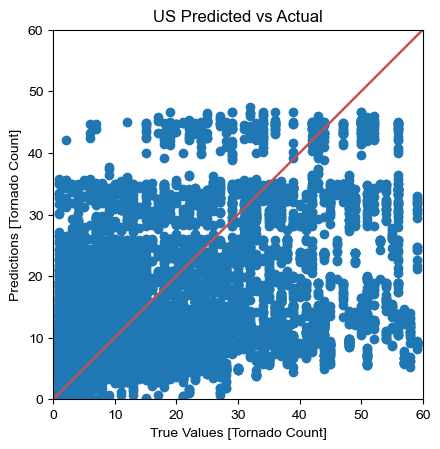

In [93]:
plt.axes(aspect='equal')
plt.scatter(test_labels, test_predictions)
plt.xlabel('True Values [Tornado Count]')
plt.ylabel('Predictions [Tornado Count]')

lims = [0, 60]
plt.xlim(lims)
plt.ylim(lims)
mpl.style.use('seaborn')
plt.title('US Predicted vs Actual')
_ = plt.plot(lims, lims, 'C2')
plt.savefig('data_sets/conus_predicted_tornados.png')
plt.show()

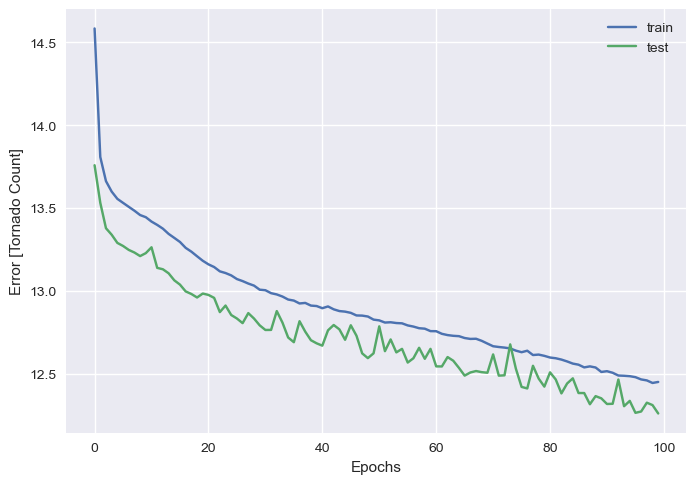

In [94]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.grid(True)
plt.xlabel('Epochs')
plt.ylabel('Error [Tornado Count]')
mpl.style.use('seaborn')
plt.savefig('data_sets/tornado_accuracy.png')
plt.show()

In [95]:
final_tornado.iloc[:,2:5].head()

,BEGIN_TIME,COUNT,month
0,520.0,18.0,7.0
1,1530.0,33.0,4.0
2,347.0,2.0,10.0
3,1355.0,21.0,3.0
4,1700.0,5.0,1.0


In [96]:
pred_dt = {}

In [143]:
final_tornado.head()

,date,STATE_FIPS,BEGIN_TIME,COUNT,month
0,2005-07,1.0,520.0,18.0,7.0
1,1974-04,1.0,1530.0,33.0,4.0
2,2012-10,1.0,347.0,2.0,10.0
3,2012-03,1.0,1355.0,21.0,3.0
4,1974-01,1.0,1700.0,5.0,1.0


In [144]:
state_df = final_tornado[['STATE_FIPS']].copy()
#state_df.head
unique_state = state_df.drop_duplicates()
unique_state
state_list = unique_state['STATE_FIPS'].tolist()
# type(state_f)
# state_list = list(state_f)
#state_list

In [168]:
state_df.head

<bound method NDFrame.head of        STATE_FIPS
0             1.0
1             1.0
2             1.0
3             1.0
4             1.0
...           ...
72688        99.0
72689        99.0
72690        99.0
72691        99.0
72692        99.0

[72693 rows x 1 columns]>

In [162]:
for s in state_list:
    print(s)

1.0
2.0
4.0
5.0
6.0
8.0
9.0
10.0
11.0
12.0
13.0
15.0
16.0
17.0
18.0
19.0
20.0
21.0
22.0
23.0
24.0
25.0
26.0
27.0
28.0
29.0
30.0
31.0
32.0
33.0
34.0
35.0
36.0
37.0
38.0
39.0
40.0
41.0
42.0
44.0
45.0
46.0
47.0
48.0
49.0
50.0
51.0
53.0
54.0
55.0
56.0
96.0
99.0


In [141]:
for l in state_list:
    print(x)
    train_features = final_tornado[final_tornado['STATE_FIPS'] == l].iloc[:,2:5].sample(frac=0.8, random_state=1)
    test_features = final_tornado[final_tornado['STATE_FIPS'] == l].iloc[:,2:5].drop(train_features.index)
    
    train_labels = train_features.pop('COUNT')
    test_labels = test_features.pop('COUNT')
    
    normalizer = preprocessing.Normalization(axis=-1)
    normalizer.adapt(np.array(train_features))
train_features.head()

,BEGIN_TIME,month
72687,1450.0,10.0
72682,1800.0,8.0
72675,1510.0,11.0
72690,1420.0,6.0
72689,1817.0,10.0


In [149]:
for l in state_list:
    #print(x)
    train_features = final_tornado[final_tornado['STATE_FIPS'] == l].iloc[:,2:5].sample(frac=0.8, random_state=1)
    test_features = final_tornado[final_tornado['STATE_FIPS'] == l].iloc[:,2:5].drop(train_features.index)
    
    train_labels = train_features.pop('COUNT')
    test_labels = test_features.pop('COUNT')
    
    normalizer = preprocessing.Normalization(axis=-1)
    normalizer.adapt(np.array(train_features))
    
    dnn_model = build_and_compile_model(normalizer)
    history = dnn_model.fit(
    train_features, train_labels,
    validation_data=(test_features, test_labels),
    verbose=0, epochs=100)
    
    test_predictions = dnn_model.predict(test_features).flatten()
    pred_dt[l]= [test_labels,test_predictions]    

UnboundLocalError: local variable 'batch_outputs' referenced before assignment

In [151]:
for key, value in pred_dt.items():
    print(key, ' : ', value)

1  :  [14       4.0
15      21.0
18      21.0
20       5.0
25      21.0
        ... 
2737    33.0
2740    25.0
2742     1.0
2744    25.0
2751    25.0
Name: COUNT, Length: 551, dtype: float64, array([10.254541 , 12.369461 , 12.900658 ,  6.2587934, 13.628043 ,
        6.3566394,  8.799599 , 16.622705 , 10.656354 , 19.752296 ,
       18.669575 , 13.581211 ,  4.8594046, 22.601904 ,  9.458317 ,
        8.107536 , 17.762472 , 16.32676  , 21.304193 , 18.77785  ,
       10.76067  ,  9.548141 ,  8.32888  ,  8.782806 , 12.966667 ,
        8.56686  , 13.26025  , 13.511997 , 13.845458 ,  3.6987245,
        3.7218132,  3.8617833,  7.748897 , 16.636469 , 26.770157 ,
        3.4473429, 10.85881  ,  8.323186 ,  6.079948 , 16.992277 ,
       12.966668 ,  3.981073 , 13.508542 , 18.191122 , 10.893009 ,
       17.746443 ,  6.925011 , 13.081084 ,  6.9934435, 22.337238 ,
       20.601038 , 17.216505 , 18.97628  , 17.550764 , 19.82073  ,
       18.681606 , 13.492561 , 13.905608 ,  6.911422 , 10.833326 ,
    

In [150]:
len(test_labels)
len(test_predictions)
final_tornado.shape

(72693, 5)

In [157]:
pred_df = pd.DataFrame()
for x in pred_dt:
    actual = pred_dt[x][0].tolist()
    predicted = list(pred_dt[x][1])
    df = pd.DataFrame({'actual':actual,'predicted':predicted})
    df['STATE_FIPS'] = x
    pred_df = pred_df.append(df)

pred_df.head(1000)

,actual,predicted,STATE_FIPS
0,4.0,10.254541,1.0
1,21.0,12.369461,1.0
2,21.0,12.900658,1.0
3,5.0,6.258793,1.0
4,21.0,13.628043,1.0
...,...,...,...
245,22.0,14.924295,5.0
246,37.0,10.700766,5.0
247,1.0,9.495493,5.0
248,15.0,8.802881,5.0


In [158]:
pred_df.to_csv('data_sets/tornado_final.csv', index=False)

In [192]:
final_tornado.head()

,date,STATE_FIPS,BEGIN_TIME,COUNT,month
0,2005-07,1.0,520.0,18.0,7.0
1,1974-04,1.0,1530.0,33.0,4.0
2,2012-10,1.0,347.0,2.0,10.0
3,2012-03,1.0,1355.0,21.0,3.0
4,1974-01,1.0,1700.0,5.0,1.0


In [198]:
count_df = pred_df[pred_df['STATE_FIPS'] == 49].count()
count_df

actual        27
predicted     27
STATE_FIPS    27
dtype: int64